In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import math

plt.rc("font", family = "AppleGothic")

In [39]:
fp = pd.read_csv('./Kaggle_Struggle_data/SeoulFloating.csv')

fp['dayofweek'] = fp['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').weekday()).astype('str')
fp['month'] = fp['date'].apply(lambda x: x[6:7])
fp['new_date'] = fp['month'].astype('str') +'/'+fp['date'].apply(lambda x: x[8:])
fp = fp.sort_values(['date', 'hour', 'birth_year', 'sex'])
fp.reset_index(drop = True, inplace = True)

In [40]:
fp.head()

,date,hour,birth_year,sex,province,city,fp_num,dayofweek,month,new_date
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140,2,1,1/01
1,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450,2,1,1/01
2,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880,2,1,1/01
3,2020-01-01,0,20,female,Seoul,Eunpyeong-gu,27750,2,1,1/01
4,2020-01-01,0,20,female,Seoul,Gangbuk-gu,19490,2,1,1/01


In [41]:
time = pd.read_csv('./Kaggle_Struggle_data/Time.csv')
time['month'] = time['date'].apply(lambda x: x[6:7])
time['new_date'] = time['month'].astype('str') + '/' + time['date'].apply(lambda x: x[8:])
time['dayofweek'] = time['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').weekday()).astype('str')

In [42]:
time.head()

,date,time,test,negative,confirmed,released,deceased,month,new_date,dayofweek
0,2020-01-20,16,1,0,1,0,0,1,1/20,0
1,2020-01-21,16,1,0,1,0,0,1,1/21,1
2,2020-01-22,16,4,3,1,0,0,1,1/22,2
3,2020-01-23,16,22,21,1,0,0,1,1/23,3
4,2020-01-24,16,27,25,2,0,0,1,1/24,4


In [44]:
def plot_correlatiin(city, time, fp):
    holiday = ['1/01', '1/21','1/22','1/23','1/24','1/25','1/26','1/27','1/28','1/29','1/30']
    dayofweek_map = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

    fig, ax = plt.subplots(3, 2, figsize = (18,8),  gridspec_kw={'wspace': 0.2})
    
    for i in range(0,6):
        
        time_df = time[(time['date'] < '2020-03-01')&( time['dayofweek'] == str(i))]
        time_df = time_df[~time_df['new_date'].isin(holiday)].reset_index(drop=True)    

        tmp = fp[(fp['city'] == city) & (fp['date'] >= '2020-01-20') & (fp['dayofweek'] == str(i))]
        tmp = tmp[~tmp['new_date'].isin(holiday)]
        group_= pd.DataFrame(tmp.groupby(['date'])['fp_num'].mean())
        group_.reset_index(inplace = True)

        join_data = pd.merge(time_df, group_, how = 'left', on = 'date')

        correlations =  join_data[['test','negative', 'confirmed', 'fp_num']].corr()


        # Heatmap of correlations
        fig.suptitle('{} correlations Every day of the week'.format(city), fontsize = 16)
        
        a = int(math.floor(i/2))
        b = i % 2
        fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, wspace=0.1)
        t= sns.heatmap(correlations, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1, ax = ax[a,b])
        t.set_title("{}".format(dayofweek_map[i]), fontsize=8.5)
        
        
        correlations.reset_index(inplace = True)
        tmp = correlations.loc[0:2, 'fp_num']
        if i == 0:
            base = tmp.copy()
        else:

            base = pd.concat([base, tmp], axis = 1)


    base = base.T
    base.reset_index(drop= True, inplace = True)
    base.columns = ['test','negative','confirmed']
    week = pd.DataFrame(['Monday', 'Tuesday',  'Wednesday', 'Thursday', 'Friday', 'Saturday'], columns = ['week'])
    base = pd.concat([base,week], axis = 1)
    return base
    

def correlation_fp_num(base):
    plt.figure(figsize=(10, 8))
    for i in ['test','negative','confirmed']:
        plt.plot(base['week'], base[i])
        plt.legend()
    plt.ylabel('correlation between fp_num', fontsize = 15)
    plt.show()

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


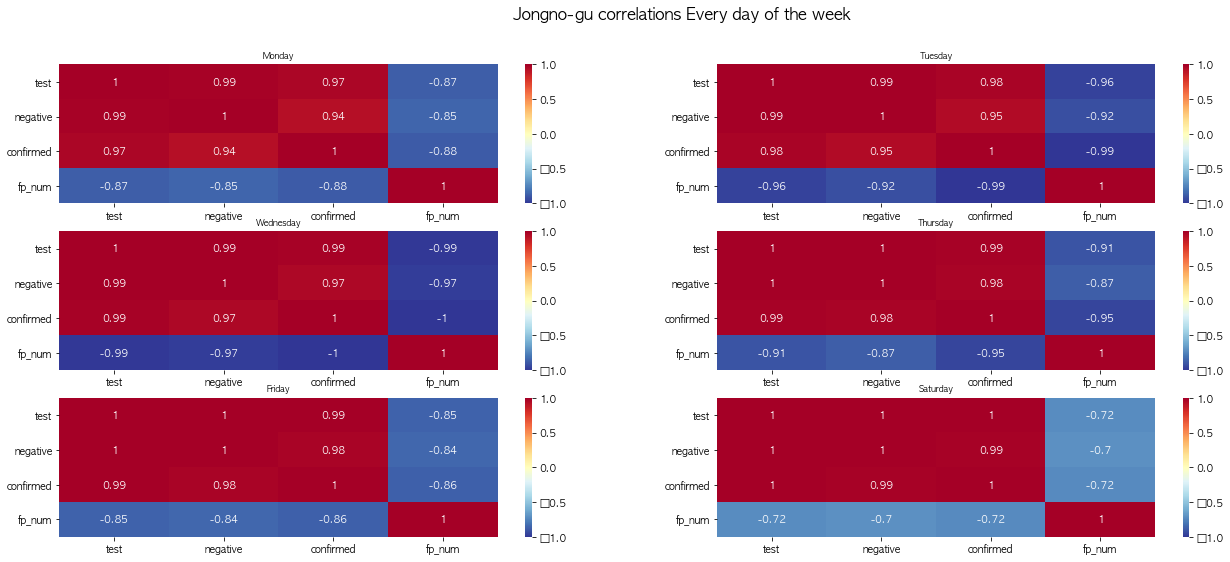

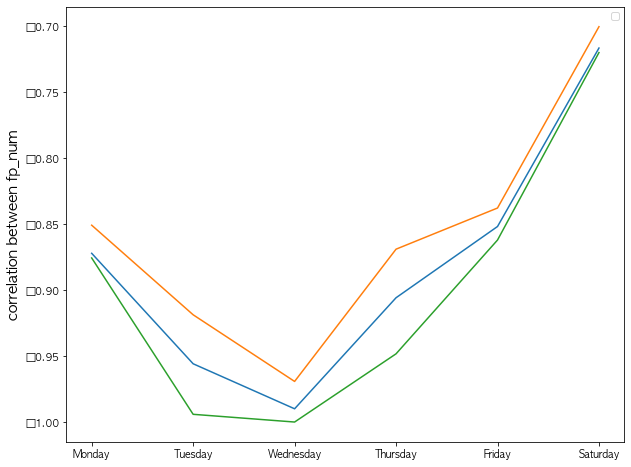

In [45]:
base = plot_correlatiin('Jongno-gu', time, fp)
correlation_fp_num(base)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


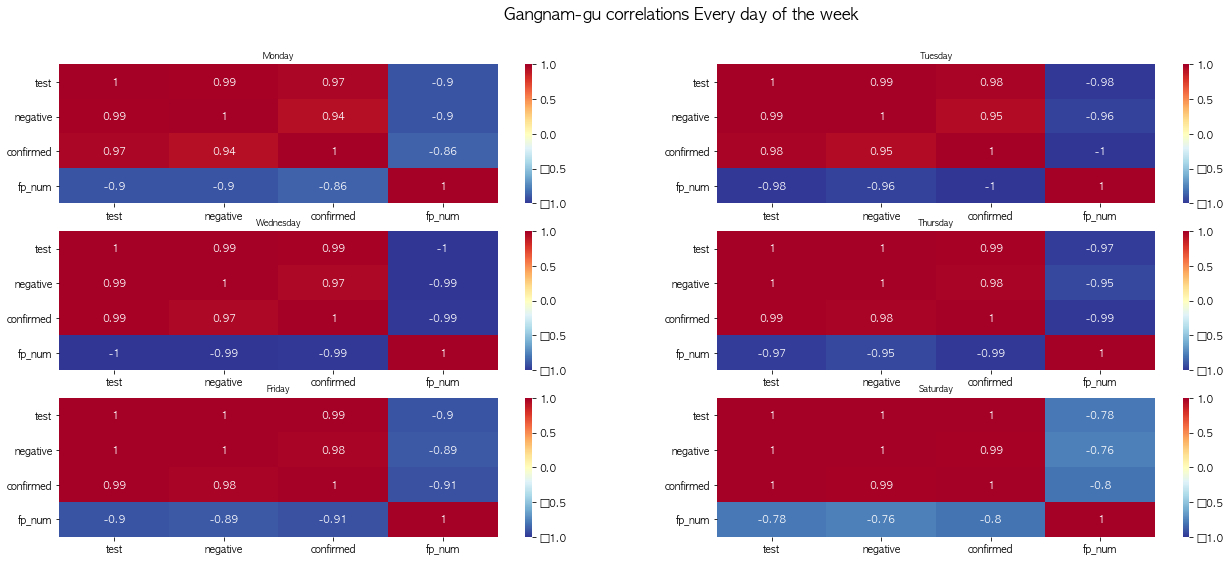

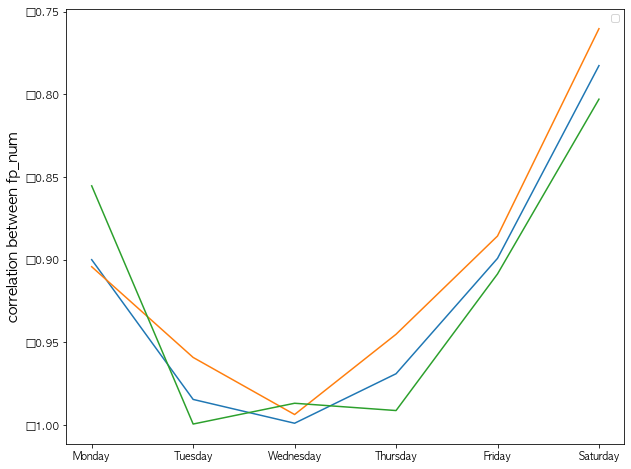

In [46]:
base = plot_correlatiin('Gangnam-gu', time, fp)
correlation_fp_num(base)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


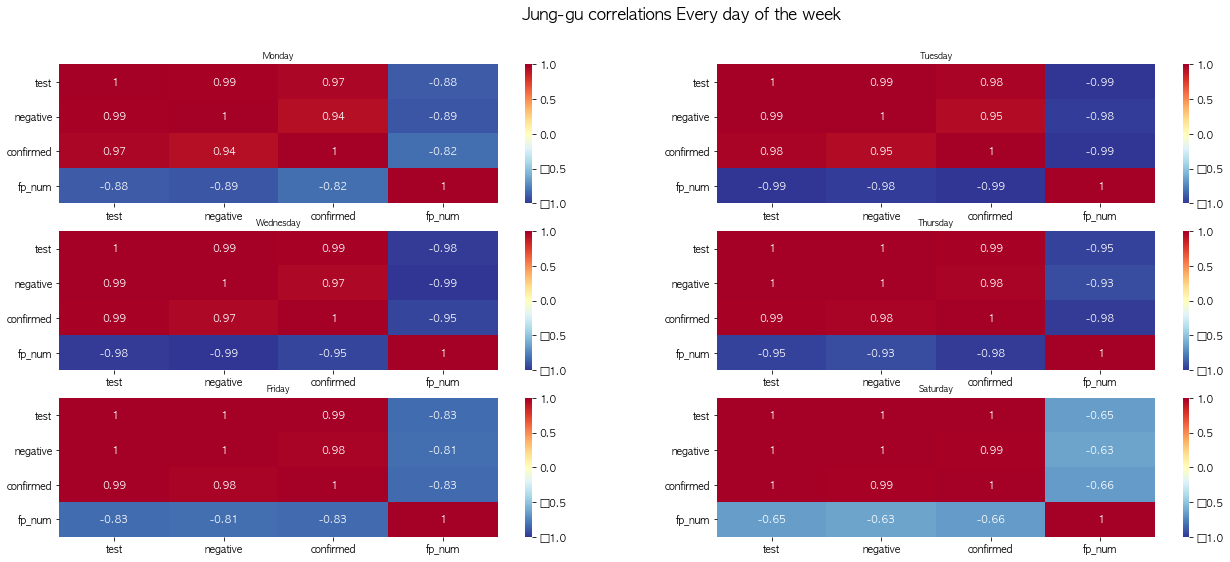

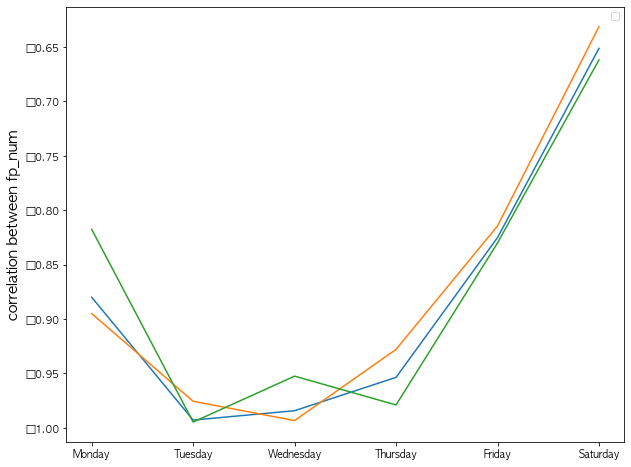

In [47]:
base = plot_correlatiin('Jung-gu', time, fp)
correlation_fp_num(base)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


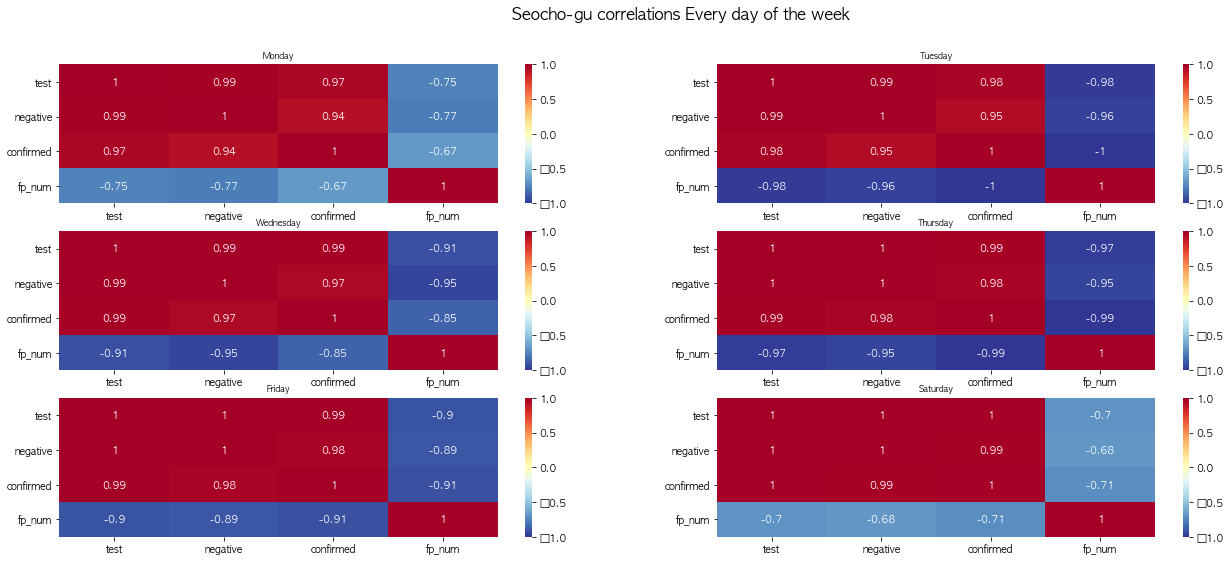

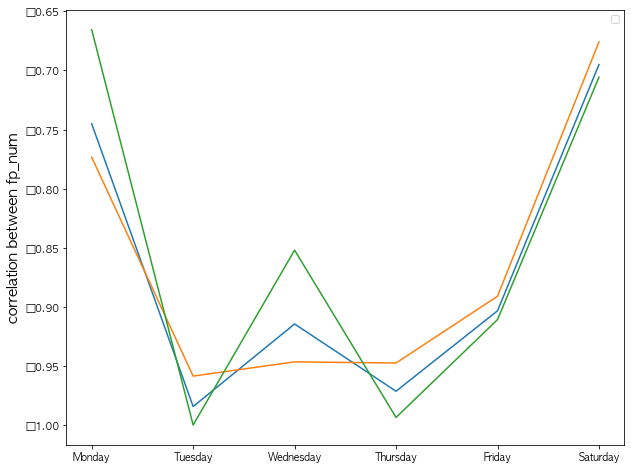

In [48]:
base = plot_correlatiin('Seocho-gu', time, fp)
correlation_fp_num(base)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


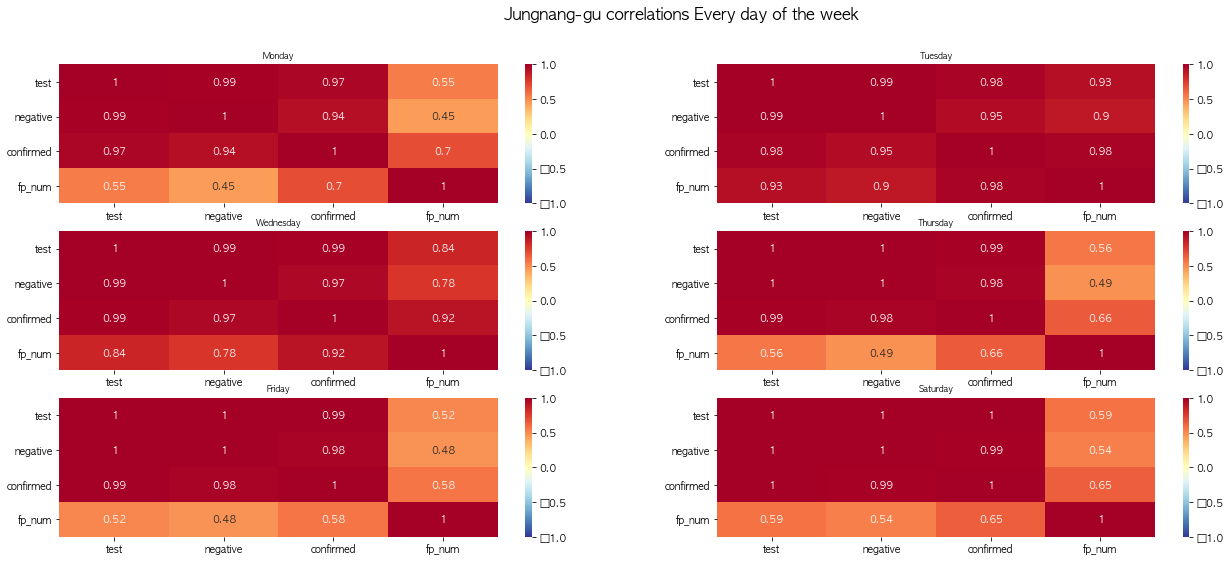

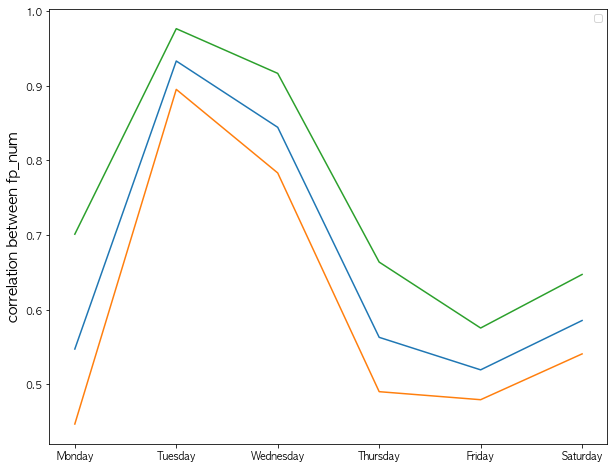

In [49]:
base = plot_correlatiin('Jungnang-gu', time, fp)
correlation_fp_num(base)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


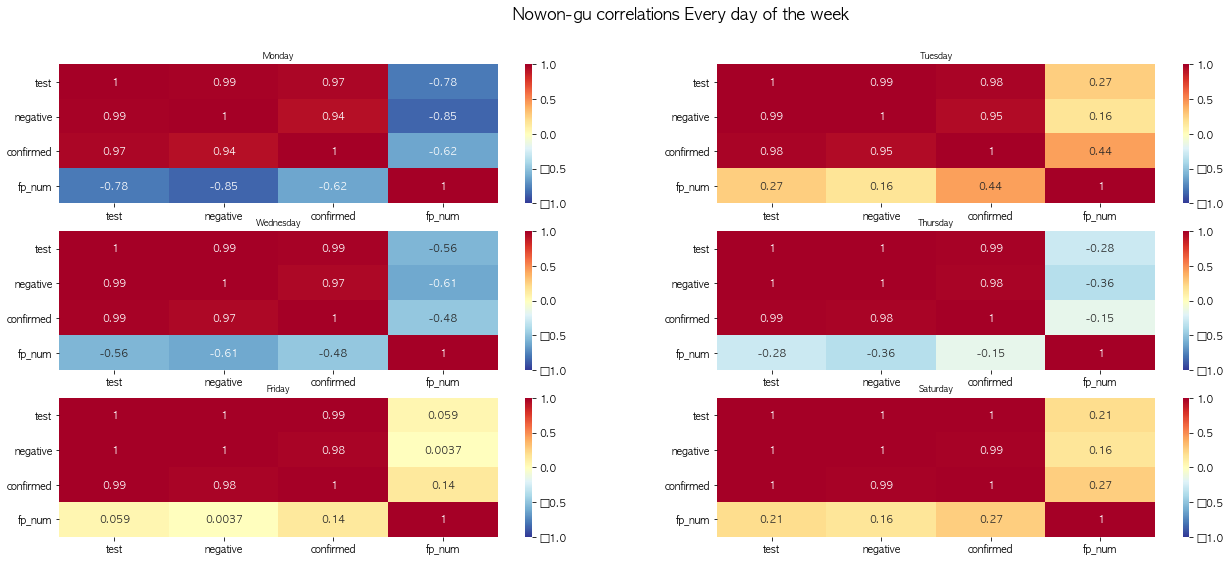

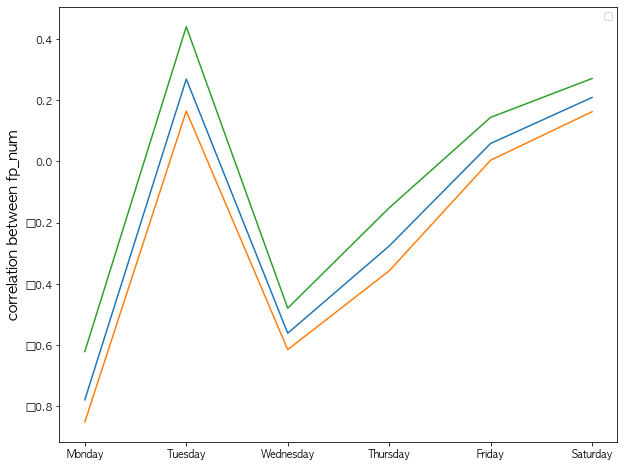

In [50]:
base = plot_correlatiin('Nowon-gu', time, fp)
correlation_fp_num(base)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


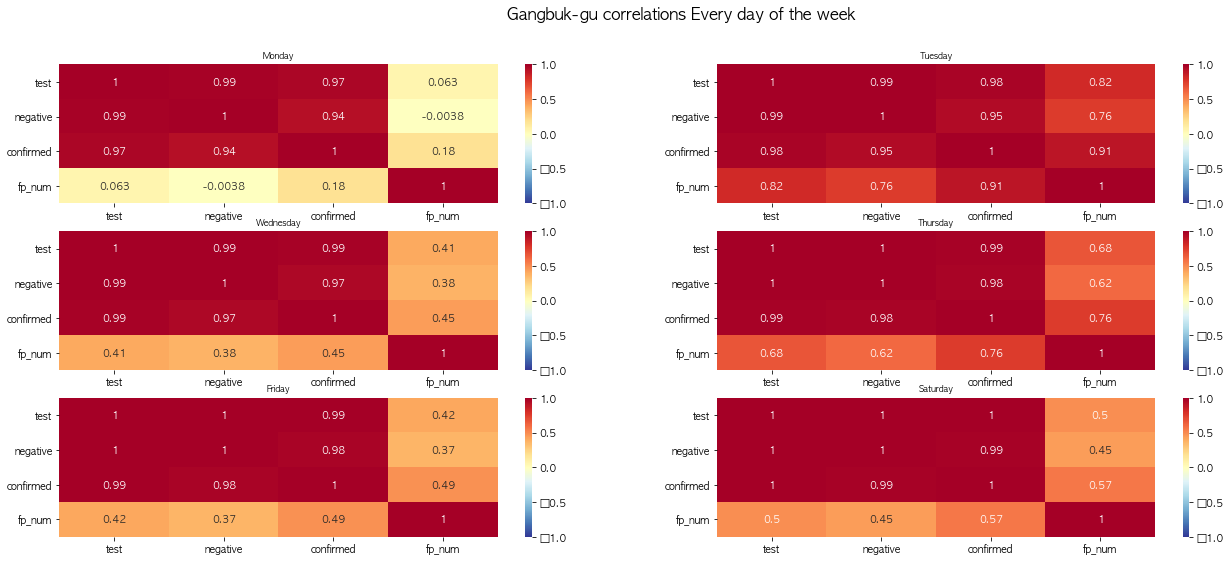

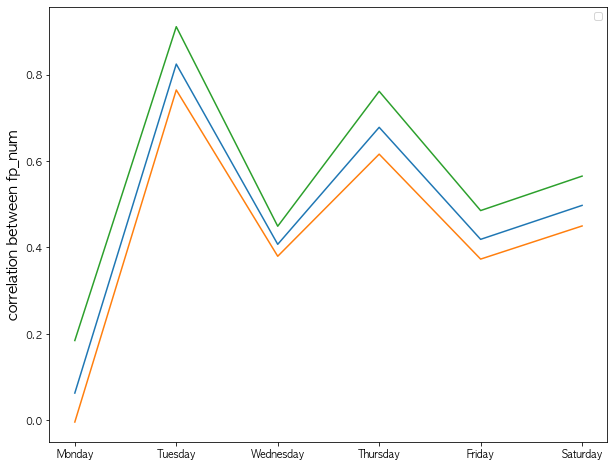

In [51]:
base = plot_correlatiin('Gangbuk-gu', time, fp)
correlation_fp_num(base)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


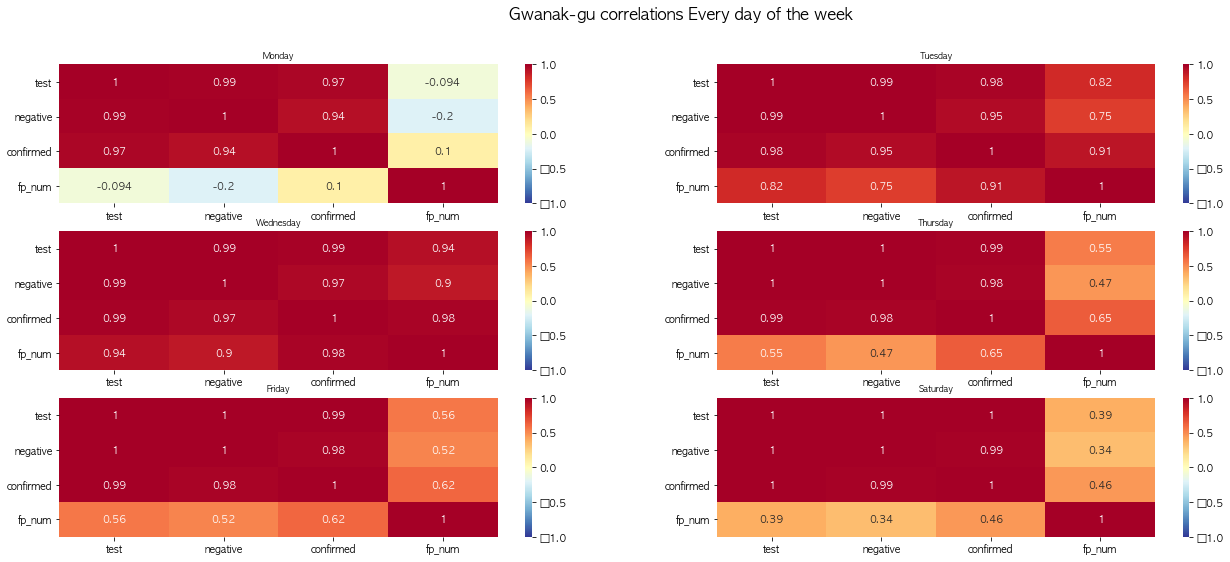

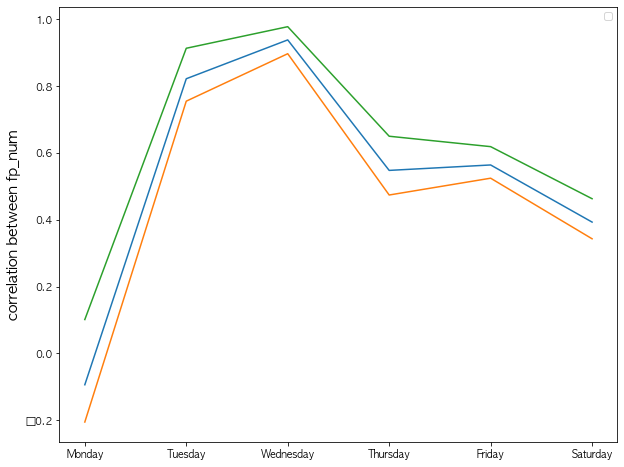

In [52]:
base = plot_correlatiin('Gwanak-gu', time, fp)
correlation_fp_num(base)

In [62]:
def birth_corr_plot(city, time, fp):

    holiday = ['1/01', '1/21','1/22','1/23','1/24','1/25','1/26','1/27','1/28','1/29','1/30']
    dayofweek_map = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    
    for j in [20, 30, 40, 50, 60, 70]:
        for i in range(0, 6):
            time_df = time[(time['date'] < '2020-03-01') & (time['dayofweek'] == str(i))]
            time_df = time_df[~time_df['new_date'].isin(holiday)].reset_index(drop=True)
            tmp = fp[(fp['city'] == city) & (fp['date'] >= '2020-01-20') & (fp['dayofweek'] == str(i)) & (fp['birth_year'] == j)]
            tmp = tmp[~tmp['new_date'].isin(holiday)]
            group_=pd.DataFrame(tmp.groupby(['date'])['fp_num'].mean())
            group_.reset_index(inplace = True)
            
            join_data = pd.merge(time_df, group_, how = 'left', on = 'date')
            
            correlations = join_data[['test', 'negative','confirmed','fp_num']].corr()
            
            correlations.reset_index(inplace = True)
            tmp = correlations.loc[2:2, 'fp_num']
            if i == 0:
                base = tmp.copy()
            else:
                base = pd.concat([base, tmp], axis = 1)
        
        base = base.T
        base.reset_index(drop = True, inplace = True)
        base.columns = ['confirmed']
        week = pd.DataFrame(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], columns = ['week'])
        base = pd.concat([base,week], axis = 1)
        base['birth_year'] = j
        
        if j == 20:
            birth_base = base.copy()
        else:
            birth_base = pd.concat([birth_base, base], axis = 0)
    
    palette = sns.color_palette('mako_r', 6)
    plt.figure(figsize = (10,8))
    sns.lineplot(data = birth_base, x = 'week', y = 'confirmed', hue = 'birth_year', palette = palette, sort = False)
    plt.show()

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


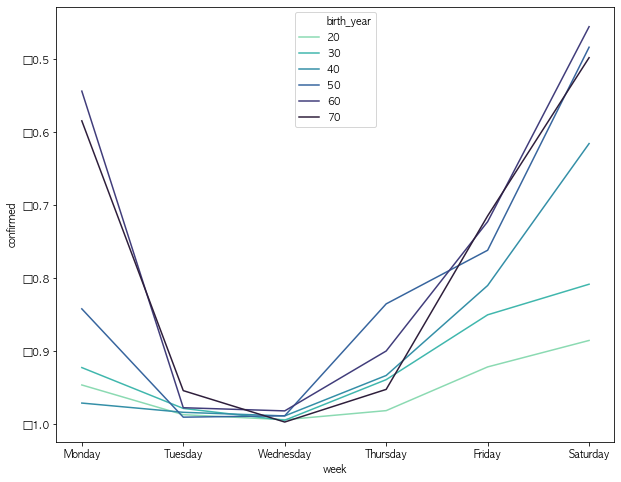

In [63]:
birth_corr_plot('Jongno-gu', time, fp)

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


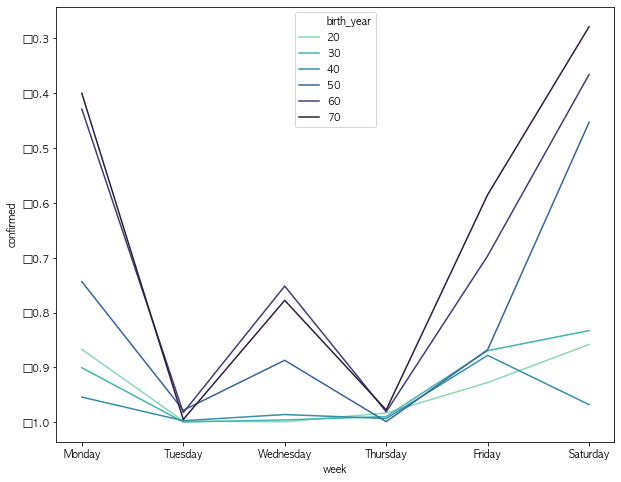

In [64]:
birth_corr_plot('Gangnam-gu', time, fp)

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


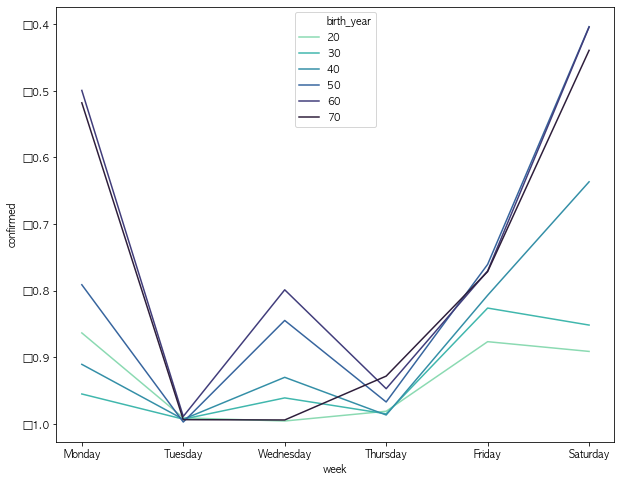

In [65]:
birth_corr_plot('Jung-gu', time, fp)

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


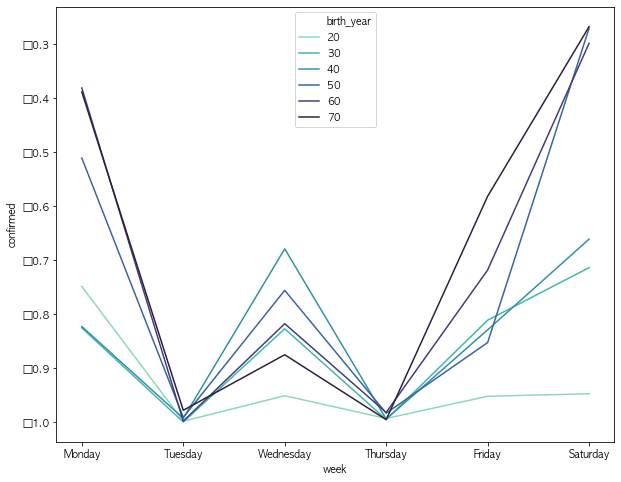

In [66]:
birth_corr_plot('Seocho-gu', time, fp)

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


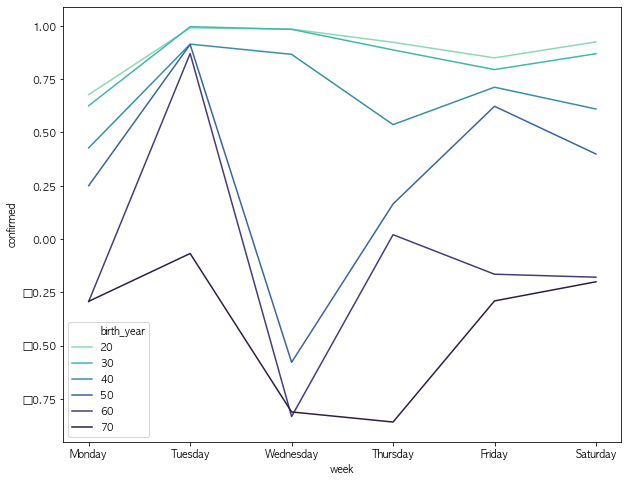

In [67]:
birth_corr_plot('Jungnang-gu', time, fp)

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


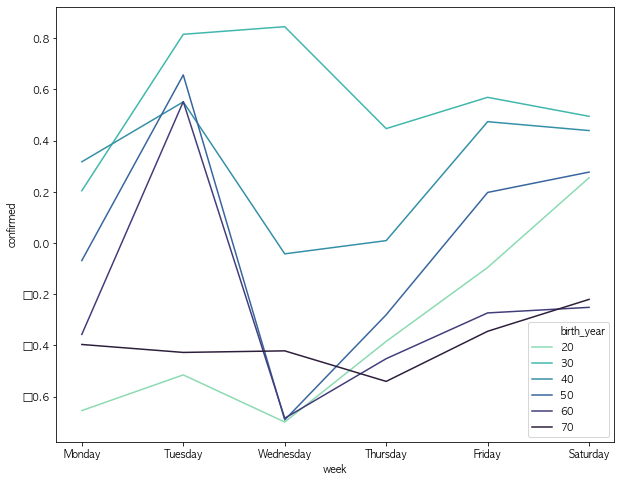

In [68]:
birth_corr_plot('Nowon-gu', time, fp)

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


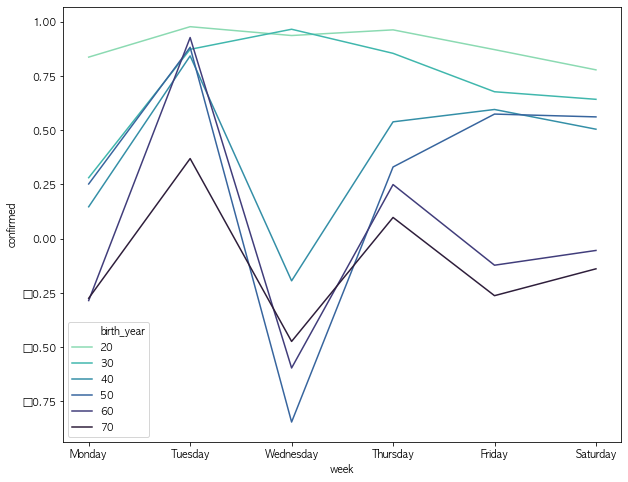

In [69]:
birth_corr_plot('Gangbuk-gu', time, fp)

/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/imjong-in/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


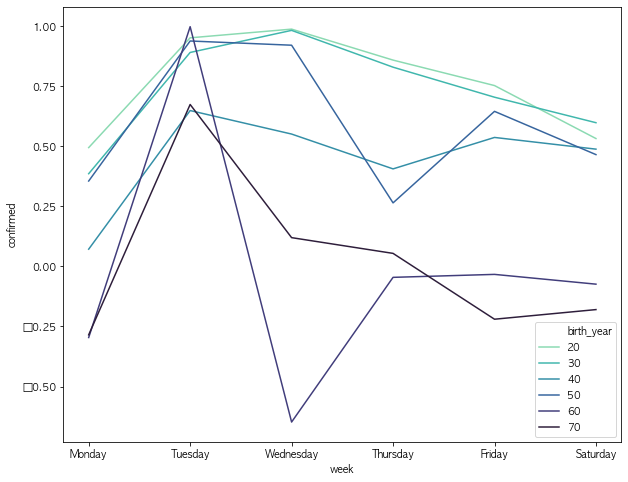

In [70]:
birth_corr_plot('Gwanak-gu', time, fp)